# Convolution Neural Networks
computer vision
self driving cars, image recognition, classification

CLASSIFICATION

what is a convolutional neural network?
convolutional layer
pooling layer
image data and other data

## Image

previously we had 2 dimensional data

with images, we have 3 dimensions

we have height and width, but we also have color channels

an image is made of 3 layers, one for each color in RGB. Each layer is itself a channel

## Convolutional neural network
dense neural network:
we looked at the entire image at once and used features from that image, in terms of shape and location to identify what an image was

but suppose we were to flip the cat over?

then the dense neural network would have no idea it was a cat

the dense global network learns globally, so everything needs to be centered and facing the camera

convolutional networks learns patterns in a specific area

does the object have ears? does it have paws? does it have eyes? That is what a convolutional neural network does

the dense neural networks learn global patterns, the ear must exist here

the convolutional neural network learns general patterns. The ear looks like this

the convolutional neural network find patterns everywhere

dense neural networks output numeric values

convolutional networks return feature maps

much like what you learned in SDSC, the convolutional neural network will run a matrix and multiply is over the values in the image, and see the output value and patterns. We will run many different filters running at a time. It will look for edges and curves and such by looking at the composite of these filter maps.

the matrix is like a scanning device that looks at individual pieces of the network

## Convolutional layers

each layer has some features

* input size
* how many filters
* sample filters

at each different layer, we look for many different filters, 32, 64, 128 filter usually

the filters are what will be trained. You tell it, "We are looking for this filter value"


The feature map is always a bit smaller than the original image, and it tells us about the specific features of the original image

if we have 2 filters, we have 2 maps, and we have a depth 2 convolution

so what we do is get the dot product of every position the filter moves over. Each value is multiplied by its corresponding value on the filter from the original image

then each output point on the map will be a value to represent the similarity of the filter and the area of the image it is filtering over

we basically perform smaller dense neural network analysis of individual segments of the image until we generate a more complex understanding

in the map output, the area of the matrix map will be equal to the number of times the filter was used on the original image

so we repeat this operation 64 or so times

this is kinda slow, so how do we speed it up?

### Pooling
when we have all the maps from the original image, we will filter the output maps, and we will redo the entire process at the next level. That way we can get more information about larger bodies in the image. So we will need another filter!

sometimes we want to make sure the output map of the original image is the same dimensions as the original. So we must pad it with random pixels. That way pixels that are important to us are always in the center of the filter matrix

we can add stride, or move over more than one unit on the matrix at a time to speed things up

we will have a ton of layers for these filters. 

there are 3 types of pooling to help us
* min
* max
* average

taking specific values from a sample of the output of the feature map. Once the output map is generated, to reduce its dimensionality, we can sample a 2x2 area and find the min, max, or average. Then we take that average, minimum, or maximum of the 2x2 matrix and put it into a smaller matrix. We repeat that process and sample from every possible position on the matrix until we have a new one, with reduced dimensions. Average pooling isnt particularly good

* average: whats the average?
* max: does an element exist?
* min: does an element not exist?




## Cifar dataset
for our convolutional neural network we will be using the CIFAR dataset to classify 10 different everyday object. 
* Airplane
* Car
* bird
* cat
* deer
* dog
* frog
* horse
* Ship
* truck

In [73]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
from numba import jit
import numba

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # This is not a numpy array, so its hard to look at
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

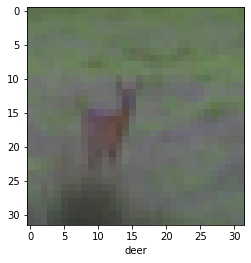

In [10]:
# look at one image
IMG_INDEX = 420

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture
We stack a bunch of convolutional layers and max-min-average pool layers together. Every layer we usually have a pooling layer

1. define number of layers
2. activation function
3. input_shape: what is the shape of the input?

1. Shape of the pooling filter

In [11]:
# this part finds features
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))) # shape of data is 32 by 32 by 3, with 32 filters of 3 x 3 shape and a relu activation function
model.add(layers.MaxPooling2D((2, 2))) # perform a max pooling operation using 2x2 samples and a stride of 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [12]:
model.summary()
# our output shape is 30 x 30 x 32 because we dont have padding, so the 32 x 32 is reduced to 30 x 30

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
Total params: 37,856
Trainable params: 37,856
Non-traina

### Adding dense layers
now we have a convolution base to extract all the features. Now we need to use dense layers to figure out what each of these features are, and how they add up to form the whole of the image.

In [40]:
# this part analyzes features
model.add(layers.Flatten()) # turn the model output into an array
model.add(layers.Dense(64, activation = 'relu')) # 64 neuron dense layer with a relu activation
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(10)) # an output with 10 neurons for 10 different classes of object

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 512)               0

## Training

In [42]:
model.compile(optimizer='adam', # optimizer for finding path of least error, gradietn descient
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function to determine innacuracy
                metrics=['accuracy']) # set metric for judgement to accuracy

hsitory = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels)) # train and evaluate the model

Epoch 1/20
1563/1563 [==============================] - 48s 30ms/step - loss: 0.7251 - accuracy: 0.7532 - val_loss: 0.9298 - val_accuracy: 0.6931
Epoch 2/20
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6767 - accuracy: 0.7674 - val_loss: 0.8838 - val_accuracy: 0.7084
Epoch 3/20
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6514 - accuracy: 0.7757 - val_loss: 0.9003 - val_accuracy: 0.7045
Epoch 4/20
 969/1563 [=================>............] - ETA: 15s - loss: 0.6209 - accuracy: 0.7864

KeyboardInterrupt: 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8758 - accuracy: 0.7046 - 3s/epoch - 10ms/step
0.7045999765396118


## Making the best of small datasets
with convolutional neural networks we need many millions of pieces of training data to create a good model because there is so much to tweak. So we need to find a way to optimize our neural network

## Data Augmentation
This is the idea if we have one image, we can turn that image into several different images, then we can pass all those images to our model. If we can flip it stretch it compresss it etc we can turn a set of 4000 images into 40000 if we do 10 augmentations per image

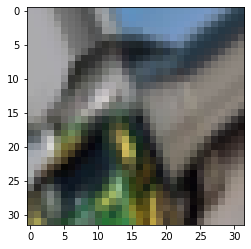

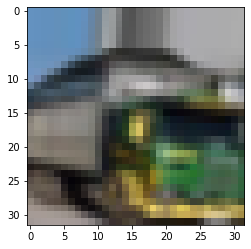

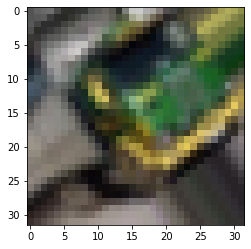

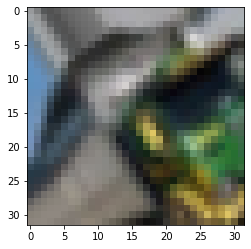

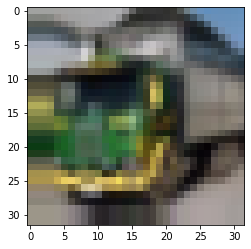

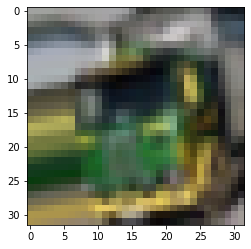

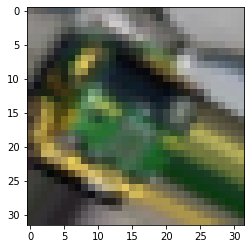

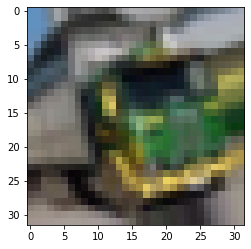

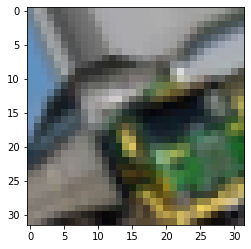

In [17]:
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator( # specify parameters of how to modify our images so we can generate additional compo9nents to our dataset
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_img = train_images[14] # pick an image from the set
img = image.img_to_array(test_img) # convert an image to a numpy array
img = img.reshape((1,) + img.shape) # reshape the image so that its a 1 d array

i = 0

for batch in datagen.flow(img, save_prefix='text', save_format='jpeg'): # this loop runs forever until we break saving images to the current directory. Augment for us and save the image
    # save the image as test.jpeg and do it as many times we want until we take
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 8:
        break

plt.show()

This will help us generalize our results

## pretrained models
if we dont have a largte enough dataset we can use a prebuilt model as a base for our own model. We can fine tune the last few layers of our network so they work for our purposes

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
keras = tf.keras 

In [22]:
import tensorflow_datasets as tfds 

(raw_train, raw_validation, raw_test), metadata = tfds.load( # load the data
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

(262, 350, 3)


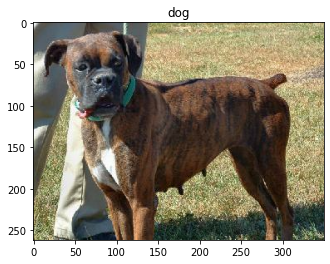

In [31]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(1):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))
    print(image.shape)

but what if the images are different sizes?
then we resize the images

In [56]:
IMG_SIZE=160

def format_example(image, label):
    # returns an image that is resized
    image = tf.cast(image, tf.float32) # convert every datapoint in the tensor into a float32
    image = (image/127.5) - 1 # dunno why do this
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

resize all images now...

In [57]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)
(160, 160, 3)


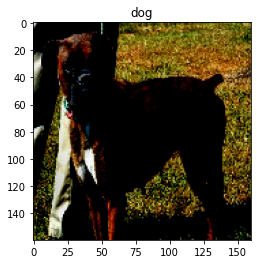

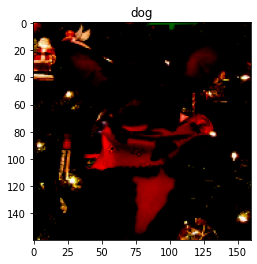

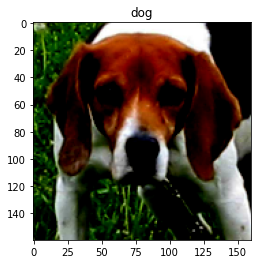

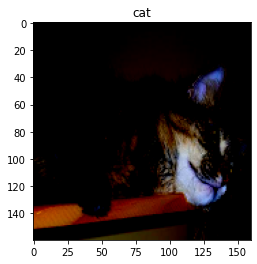

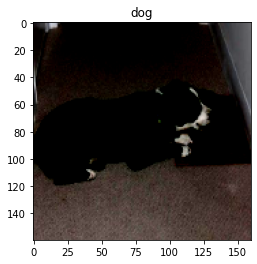

In [58]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))
    print(image.shape)

In [60]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

### Choosing a model
now whats left for us to do is to choose a model. WE use the mobilenet v2 developed by google. This model is trained on 1.4 million images and has 1000 different classes

we want to use this model but only its convolutional base so when we load the model we specify we dont want to load the top classification layer. We tell the model what input shape to expect and to use the predetermined weights from imagenet

In [61]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# create the base model from the pretrained model

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, 
                                                include_top=False, # we do not want the top, since that is the classifier. We are retraining the classifier
                                                weights='imagenet')

9406464/9406464 [==============================] - 2s 0us/step


In [62]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

all we have to do is create a classifier to identify dogs vs cats
the base model will output a shape 32, 5, 5, 1280 tensor that is a feature extraction from our original image. The 32 means that we have 32 laers of different filters/features

In [63]:
for image, _ in train_batches.take(1):
    pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [47]:
# make sure the base isnt retrained
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 175, 175, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 175, 175, 32  128         ['Conv1[0][0]']                  
                                )                                              

now that we have our base layer setup we can add the classifier. WE will use an average pooling layer that will average the entire 5x5 area of each 2d feature map and return to us a single 1280 element vector per filter

In [64]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() 

now we will take this and add our own classification layer

In [65]:
prediction_layer = keras.layers.Dense(1) # we add only one neuron because the decision between dog and cat is binary

now finally we combine the layers together in a model

In [66]:
model = tf.keras.Sequential([
    base_model, global_average_layer, prediction_layer
])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


### Training
now we train the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it

In [68]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # binary because we only have 2 possibiltiies
    metrics=['accuracy'])

c:\Program Files\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


evaluate the model without training it at all and see what it does

In [69]:
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

20/20 [==============================] - 9s 360ms/step - loss: 0.5832 - accuracy: 0.6125


now we train the mdoel for real and modify the weights and biases of the classification layer

In [76]:

history = model.fit(train_batches, 
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 1019s 2s/step - loss: 0.0719 - accuracy: 0.9738 - val_loss: 0.1104 - val_accuracy: 0.9729
Epoch 2/3
263/582 [============>.................] - ETA: 9:14 - loss: 0.0273 - accuracy: 0.9904

In [ ]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')